In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


In [3]:
# we will be creating a few functions to help decrease the repetitiveness of the code.
# first, we will create a function to standardize the given features:

def normalize(raw_data):
    """ Returns the dataframe after normalizing its values. Prints the first five results
        after standardizing the values. 
        
        Parameters:
            raw_data(DataFrame): a dataframe
            
        Returns:
            X (Dataframe): data with normalized values 
    """
    X = raw_data
    X = (X - X.mean()) / X.std()
    print(X.head(5))
    return X

In [4]:
# standardize data from the three features using the normalize function.
X = normalize(raw[['Peace', 'Legal', 'GDP Growth']])

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


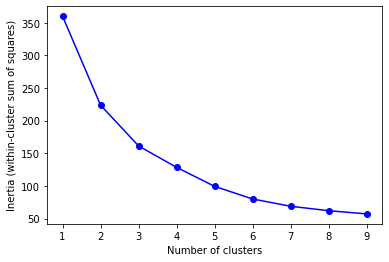

In [5]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
# perform the elbow method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [6]:
# create a function to run the KMeans Algorithm, with k clusters and n_inits

def run_kmeans(num_k, n_inits, data, check):
    """ Return the kmeans, y and centers results given num_k, n_inits, data and check.
        
        Parameters:
            num_k (int): number of clusters
            n_init (int): number of times KMeans runs with different center
            data (DataFrame): the dataframe we will be fitting to the KMeans model
            check (Boolean): if True, then print out the results from the KMeans algorithm
            
        Returns:
            kmeans (KMeans): KMeans algorithm after having the data fitted 
            y (ndarray): resulting labels from the KMeans algorithm
            centers (ndarray): resulting centers from the KMeans algorithm
    """
    k = num_k
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=n_inits)
    kmeans.fit(data)
    
    y = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    if check == True:
        # print inertia & cluster center
        print("inertia for k=3 is", kmeans.inertia_)
        print("cluster centers: ", kmeans.cluster_centers_)
        # take a quick look at the result
        print("cluster labels: ", y)

    # returns kmeans, y and centers in the same order written in the return statement
    return kmeans, y, centers

In [7]:
# use function run_kmeans to run the algorithm 
# first argument 3 --> 3 clusters
# second argument 10 --> n_init set to 10
# third argument X --> normalized data, X
# fourth argument True --> we want to print the results

kmeans, y, centers = run_kmeans(3, 10, X, True)

inertia for k=3 is 161.13338710052557
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


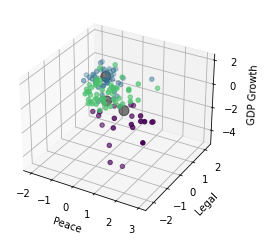

In [8]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

# plot 3D visualization 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

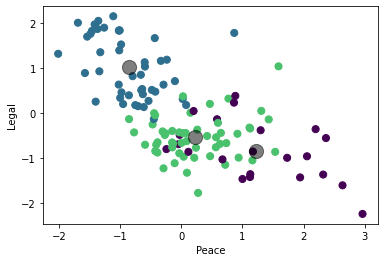

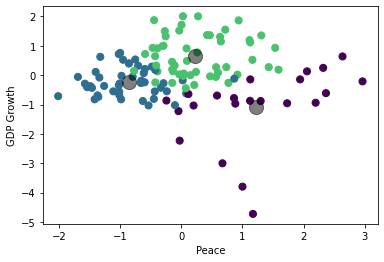

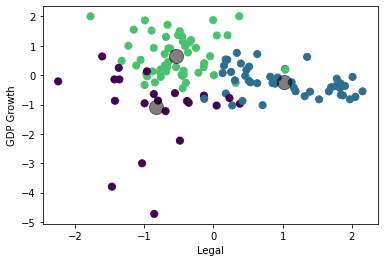

In [9]:
# plot 3 2D scatter plots 
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

In [10]:
# create a function to visualize the data as a scatterplot with abbreviated labels 

def visualize(raw_data, figs, labels, data, title, centers=None, title_str=None, var_value=None):
    """ Return None. Plot scatter graph given raw_data, figs, labels, data, and title.
    
        Parameters:
            raw_data (DataFrame): the initial raw data without normalizing the values
            figs (List[Tuple]): a list of the combinations to be graphed 
            labels (List[str]): a list of the labels for the axis and data 
            data (DataFrame): a dataframe with normalized values
            title (Boolean): if True then create a title using the optional arguments
            
            centers (ndarray): resulting centers from the KMeans algorithm
            title_str (str): variable that is the focus of the graph 
            var_value (int): value of the variable to be added to the title
    """
    colors = ['blue','green', 'red']
    raw = raw_data
    X = data

    for i in range(len(figs)):
        fig = plt.figure(i, figsize=(8, 8))
        x_1 = figs[i][0]
        x_2 = figs[i][1]
        plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
        
        # Since Agglormerative Clustering doesn't have centers, we will first try 
        # to plot the centers. This code will run for KMeans but will 
        # continue to the next line without error for AgglomerativeClustering
        try:
            plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
        except:
            pass
            
        for j in range(X.shape[0]):
            plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                     color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
        plt.xlabel(labels[x_1])
        plt.ylabel(labels[x_2])
        
        # create a title for the graph if title is True
        if title == True:
            variable = title_str + str(var_value)
            description = ' ' + labels[x_2] + ' ' 'VS' + ' ' + labels[x_1]
            plt.title(variable + description)

    plt.show()

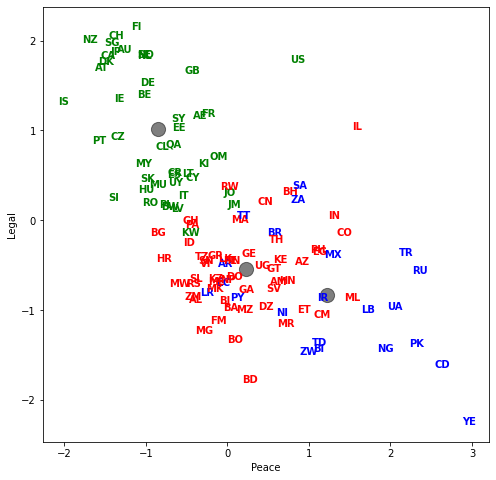

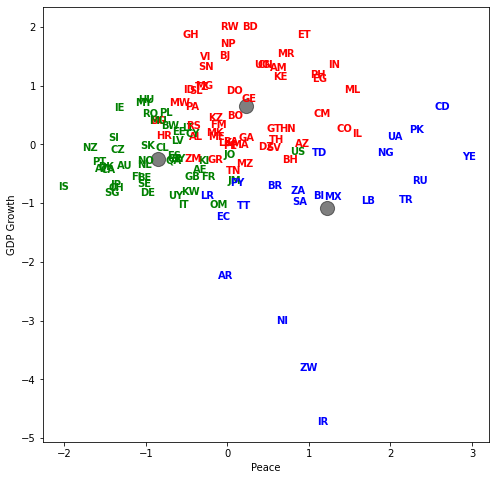

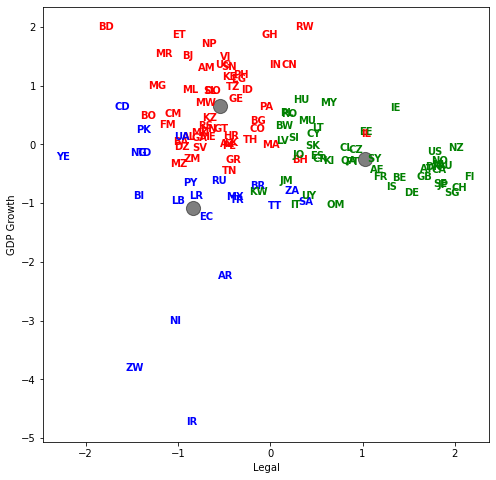

In [11]:
# plot 3 2D graphs with labels using the visualize function
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
visualize(raw, figs, labels, X, False, centers)

In [12]:
# print out the resulting labels from the KMeans algorithm 
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values(by=['Label', 'Country']))

print("\nLabel Counts:")
print(result.groupby('Label').count())

                          Country Abbrev  Label
2                       Argentina     AR      0
14                         Brazil     BR      0
16                        Burundi     BI      0
19                           Chad     TD      0
27   Democratic Republic of Congo     CD      0
30                        Ecuador     EC      0
48                           Iran     IR      0
60                        Lebanon     LB      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA

Results when n_init=2:
inertia for k=3 is 169.24242908631018
cluster centers:  [[ 0.53110654 -0.61456608  0.34774502]
 [-0.85103491  0.99692377 -0.22524313]
 [ 0.70529573 -0.95894794 -3.43893096]]
cluster labels:  [0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 2 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 2]


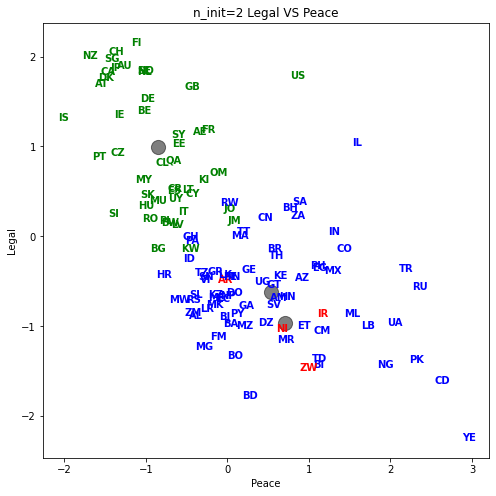

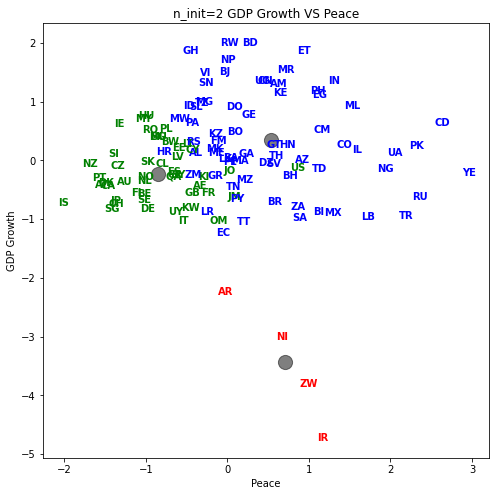

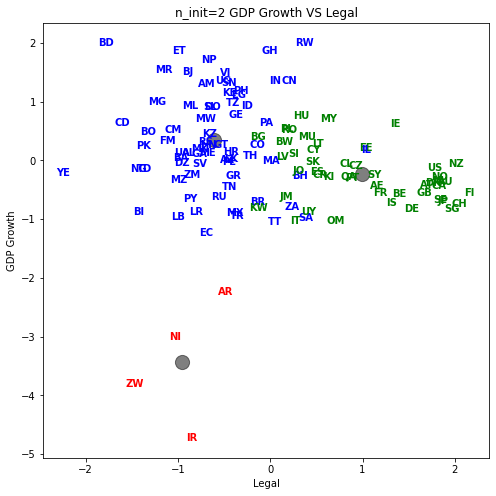


Label Counts:
     Country  Abbrev  Label
n=2                        
0         70      70     70
1         47      47     47
2          4       4      4


Results when n_init=20:
inertia for k=3 is 161.13338710052557
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


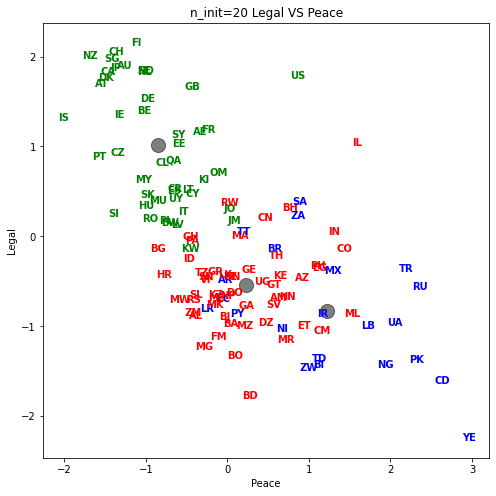

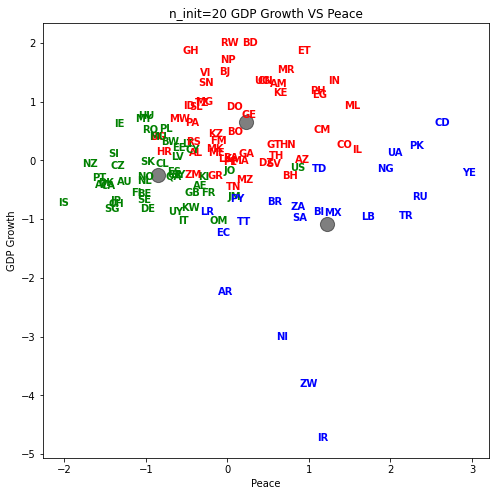

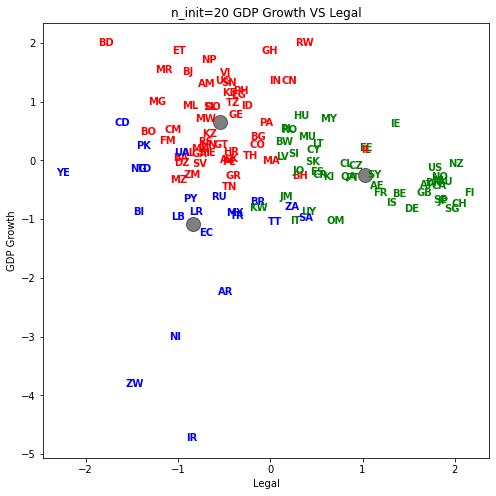


Label Counts:
      Country  Abbrev  Label  n=2
n=20                             
0          22      22     22   22
1          46      46     46   46
2          53      53     53   53


Results when n_init=50:
inertia for k=3 is 161.13338710052557
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


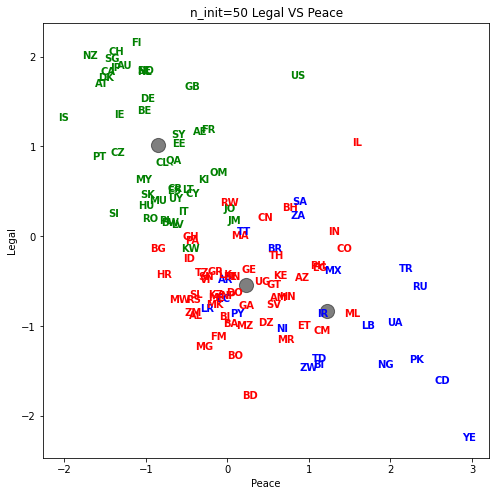

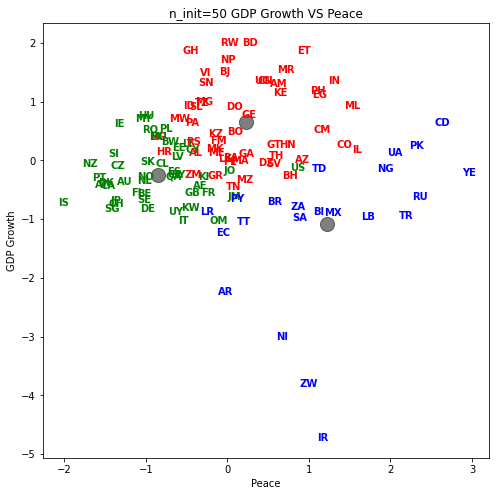

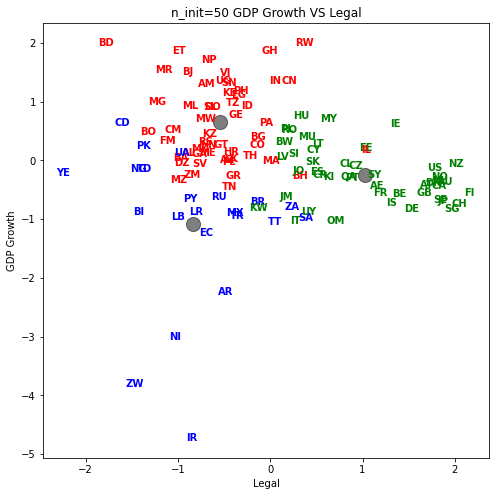


Label Counts:
      Country  Abbrev  Label  n=2  n=20
n=50                                   
0          22      22     22   22    22
1          46      46     46   46    46
2          53      53     53   53    53


Results when n_init=100:
inertia for k=3 is 161.13338710052557
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


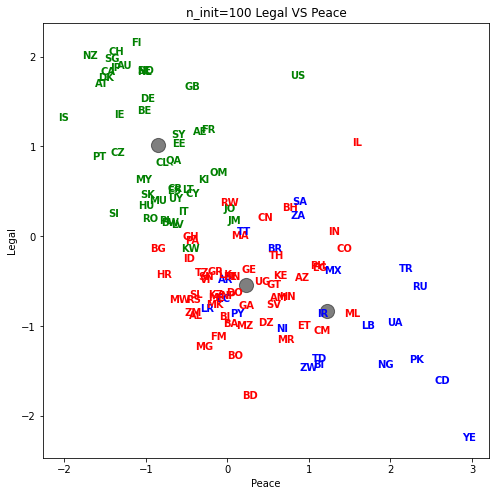

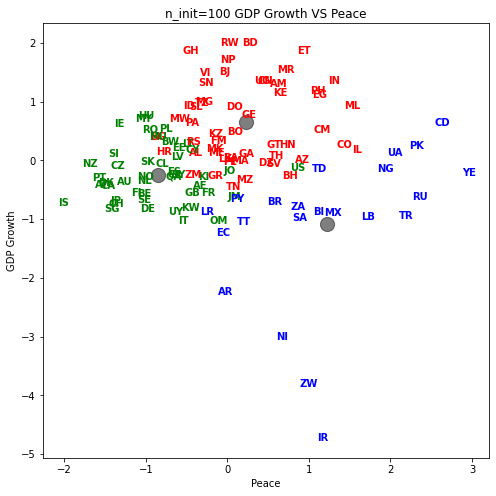

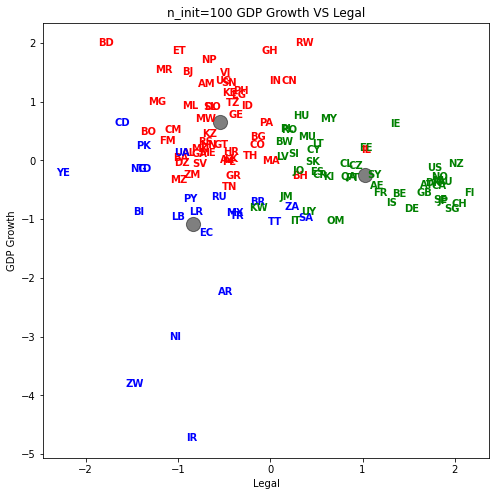


Label Counts:
       Country  Abbrev  Label  n=2  n=20  n=50
n=100                                         
0           22      22     22   22    22    22
1           46      46     46   46    46    46
2           53      53     53   53    53    53




In [13]:
# (b) set n_init to 2, 20, 50, 100, and see whether the countries in 
# the high risk cluster change

# assuming that a lower standardized legal value corresponds to high risk,
# from the results of when n_init was set at default, 10, we know that the high risk cluster
# has a Label value of 0.

# first make a copy of the result dataframe. We will be merging the new data onto the compare
# dataframe instead of the original one 
compare_data = result

# create a list containing all the values of n_init we will be testing
n_inits = [2, 20, 50, 100]

# use a for loop to run the KMeans algorithm using the different n_init values found in n_inits.
for i in range(len(n_inits)):
    
    # use run_kmeans function to fit data X to KMeans algorithm using 3 clusters
    print("Results when n_init=" + str(n_inits[i]) + ':')
    kmeans, y, centers = run_kmeans(3, n_inits[i], X, True)
    
    # for better visibility, we will try to keep all the results on the same line by labeling the results as 'n =' 
    # instead of 'n_init='
    label = 'n=' + str(n_inits[i])
    new_results = pd.DataFrame({'Country':raw['Country'], label:y})
    
    # compare_data is the results from when n_init is set at default, 10.
    compare_data = pd.merge(compare_data, new_results, how="left", on=['Country'])
    
    # visualize the data for each iteration  
    figs = [(0, 1), (0, 2), (1, 2)]
    labels = ['Peace', 'Legal', 'GDP Growth']
    visualize(raw, figs, labels, X, True, centers, 'n_init=', n_inits[i])
    
    # print out labels
    print("\nLabel Counts:")
    print(compare_data.groupby(label).count())
    print("\n")

In [14]:
# print out the results
# results under 'Label' are the results from when n_init was at default
# the rest of the results are set as 'n=i', where i represents the 
# n_init value. E.x, 'n=2' is when n_init=2

with pd.option_context('display.max_rows', None, 'display.max_columns', 7):
    print(compare_data.sort_values(by=['Label', 'Country']))

                          Country Abbrev  Label  n=2  n=20  n=50  n=100
2                       Argentina     AR      0    2     0     0      0
14                         Brazil     BR      0    0     0     0      0
16                        Burundi     BI      0    0     0     0      0
19                           Chad     TD      0    0     0     0      0
27   Democratic Republic of Congo     CD      0    0     0     0      0
30                        Ecuador     EC      0    0     0     0      0
48                           Iran     IR      0    2     0     0      0
60                        Lebanon     LB      0    0     0     0      0
61                        Liberia     LR      0    0     0     0      0
69                         Mexico     MX      0    0     0     0      0
77                      Nicaragua     NI      0    2     0     0      0
78                        Nigeria     NG      0    0     0     0      0
81                       Pakistan     PK      0    0     0     0

In [15]:
# (c) Carry out k-means clustering for k=3 with all four features 
# (corruption index, peace index, legal risk index, and GDP growth rate)

# normalize all four features
X1 = normalize(raw[['Peace', 'Legal', 'GDP Growth', 'Corruption']])

      Peace     Legal  GDP Growth  Corruption
0 -0.390081 -0.878158    0.126952   -0.633230
1  0.472352 -0.958948   -0.040772   -0.633230
2 -0.026039 -0.484397   -2.230541   -0.098542
3  0.634871 -0.684553    1.303747   -0.258948
4 -1.261182  1.900001   -0.368418    1.612460


In [16]:
# run KMeans algorithm using function run_kmeans
kmeans, y, centers = run_kmeans(3, 10, X1, True)

inertia for k=3 is 194.4046655009297
cluster centers:  [[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 1 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


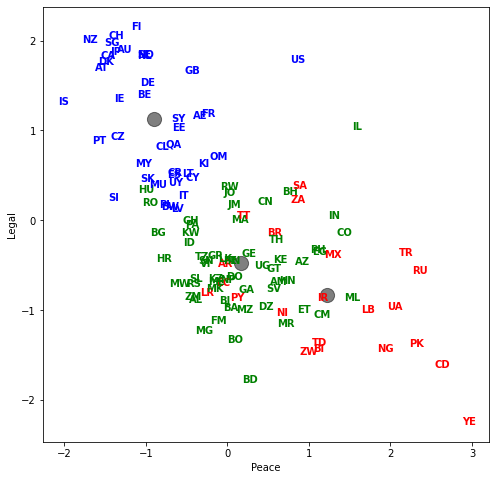

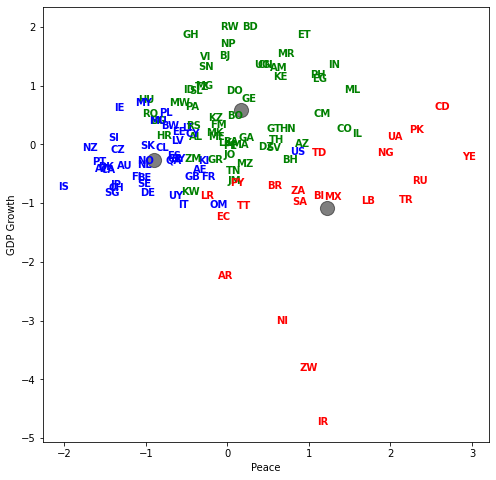

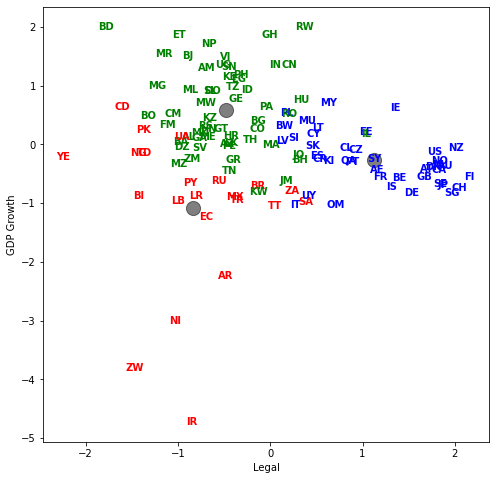

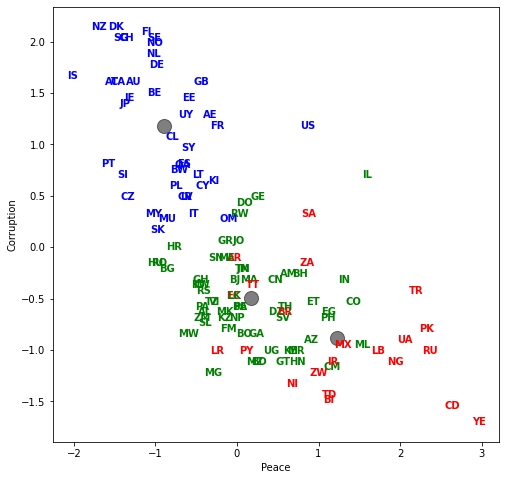

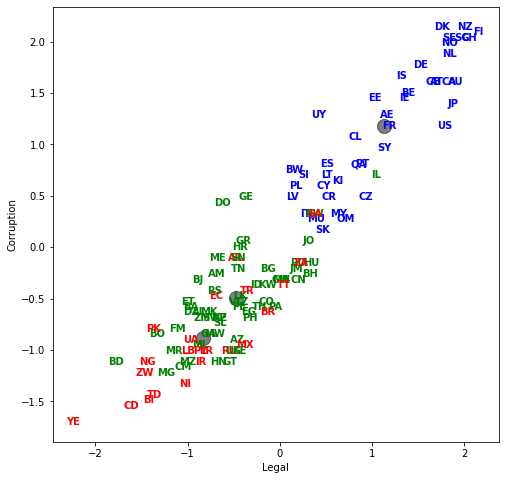

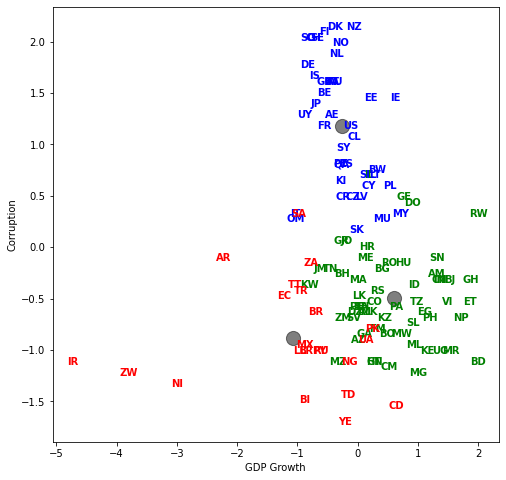

In [17]:
# Visualize the 6 results for when four features are used
# using the visualize function 

figs = [(0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3)]
labels = ['Peace', 'Legal', 'GDP Growth', 'Corruption']
visualize(raw, figs, labels, X1, False, centers)

In [18]:
# make another copy of result, so that we do not make any changes to the original dataframe
compare_data2 = result

# add the new resulting labels to the copied dataframe for comparisons
four_ft_result = pd.DataFrame({'Country':raw['Country'],'four_fts':y})
compare_data2 = pd.merge(compare_data2, four_ft_result, how="left", on=['Country'])
with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(compare_data2.sort_values(by=['Label', 'Country']))

                          Country Abbrev  Label  four_fts
2                       Argentina     AR      0         2
14                         Brazil     BR      0         2
16                        Burundi     BI      0         2
19                           Chad     TD      0         2
27   Democratic Republic of Congo     CD      0         2
30                        Ecuador     EC      0         2
48                           Iran     IR      0         2
60                        Lebanon     LB      0         2
61                        Liberia     LR      0         2
69                         Mexico     MX      0         2
77                      Nicaragua     NI      0         2
78                        Nigeria     NG      0         2
81                       Pakistan     PK      0         2
83                       Paraguay     PY      0         2
90                         Russia     RU      0         2
92                   Saudi Arabia     SA      0         2
99            

In [19]:
# the labels of the clusters from the four features are as follows:
# 0 --> low risk 
# 1 --> moderate risk
# 2 --> high risk

# however, from the 'Label' column the labels are as follows:
# 0 --> high risk 
# 1 --> low risk 
# 2 --> moderate risk 


# we will replace the labels in the four features result to match the labels
# found when we only used three features 
new_results = compare_data2['four_fts'].replace([0, 1, 2], [1, 2, 0])

# recreate the dataframe and merge
four_ft_result = pd.DataFrame({'Country':raw['Country'],'four_fts':new_results})
compare_data2 = pd.merge(compare_data2, four_ft_result, how="left", on=['Country'])

# drop the previous results
compare_data2 = compare_data2.drop(labels='four_fts_x', axis=1)

# print
with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(compare_data2.sort_values(by=['Label', 'Country']))


                          Country Abbrev  Label  four_fts_y
2                       Argentina     AR      0           0
14                         Brazil     BR      0           0
16                        Burundi     BI      0           0
19                           Chad     TD      0           0
27   Democratic Republic of Congo     CD      0           0
30                        Ecuador     EC      0           0
48                           Iran     IR      0           0
60                        Lebanon     LB      0           0
61                        Liberia     LR      0           0
69                         Mexico     MX      0           0
77                      Nicaragua     NI      0           0
78                        Nigeria     NG      0           0
81                       Pakistan     PK      0           0
83                       Paraguay     PY      0           0
90                         Russia     RU      0           0
92                   Saudi Arabia     SA

In [20]:
# (d) Determine 3 clusters using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [21]:
# normalize all variable values 
X2 = normalize(raw[['Peace', 'Legal', 'GDP Growth']])

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


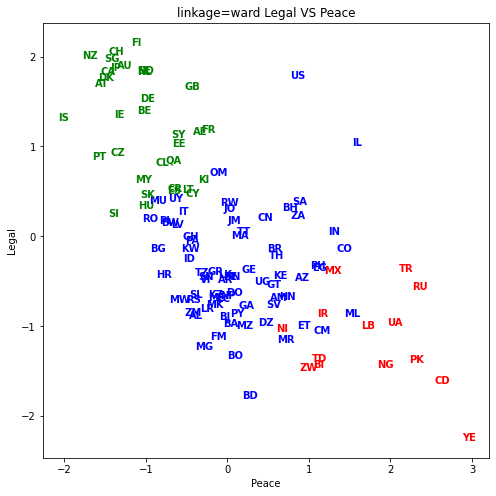

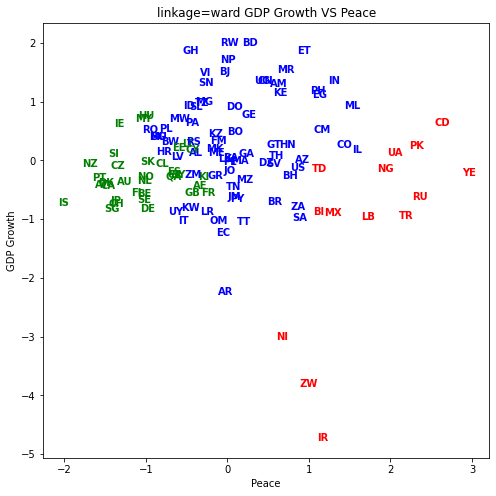

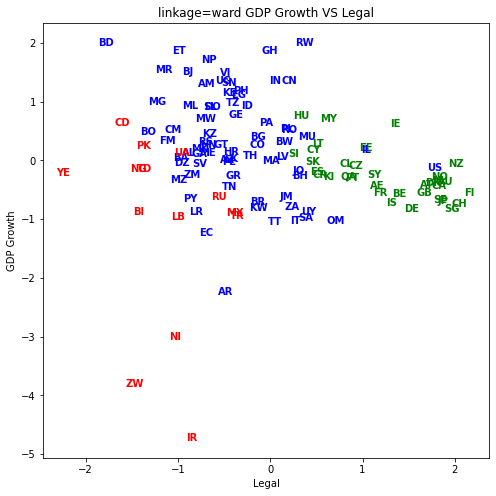


Label Count:
      Country  Abbrev  Label
ward                        
0          73      73     73
1          34      34     34
2          14      14     14


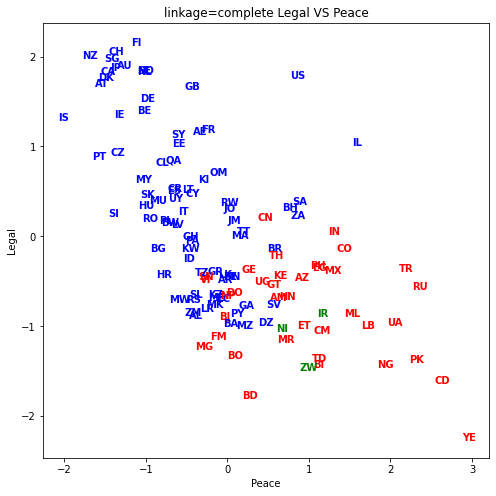

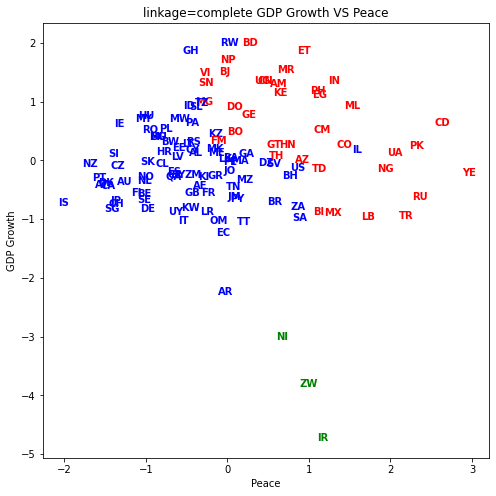

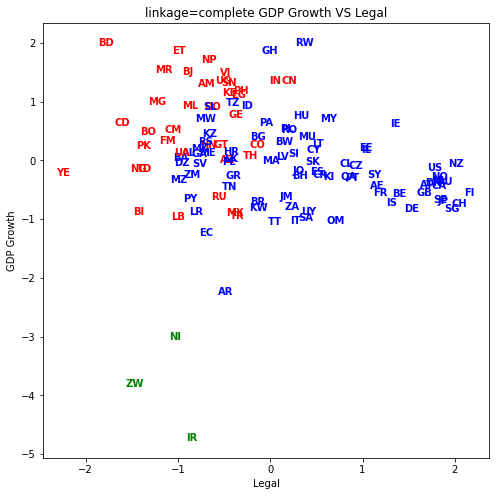


Label Count:
          Country  Abbrev  Label  ward
complete                              
0              81      81     81    81
1               3       3      3     3
2              37      37     37    37


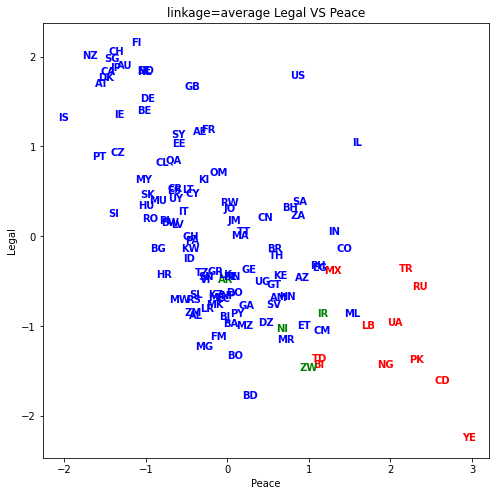

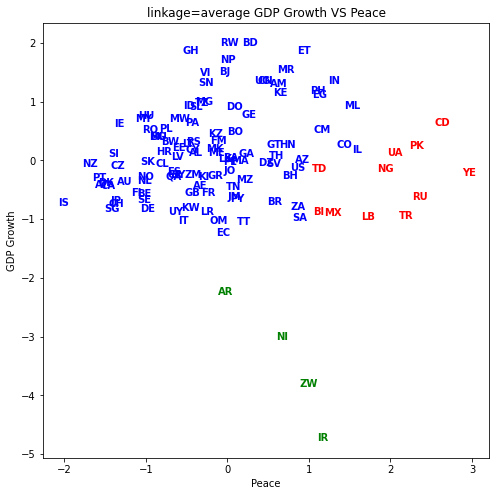

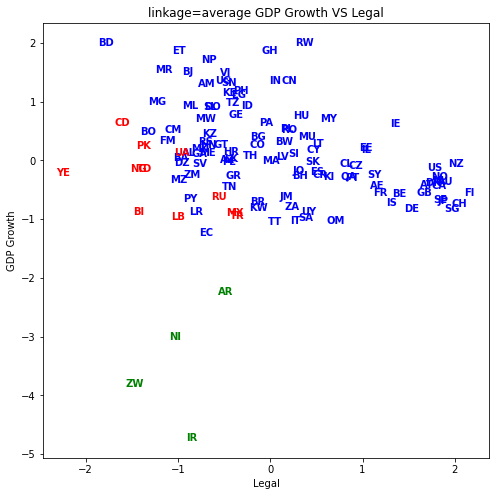


Label Count:
         Country  Abbrev  Label  ward  complete
average                                        
0            106     106    106   106       106
1              4       4      4     4         4
2             11      11     11    11        11


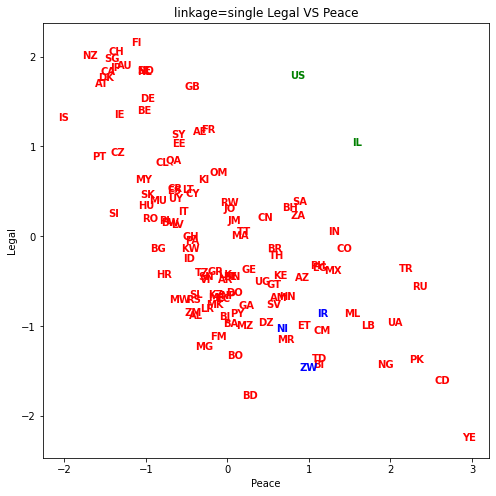

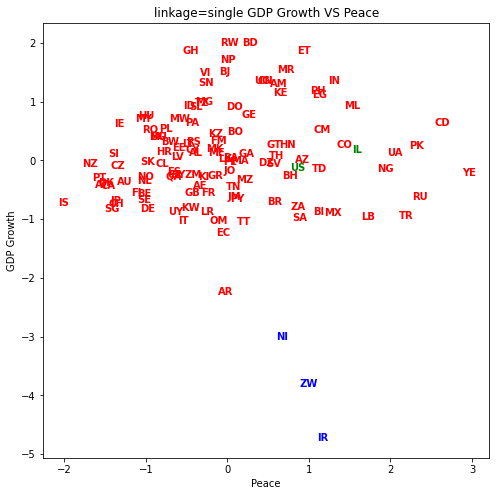

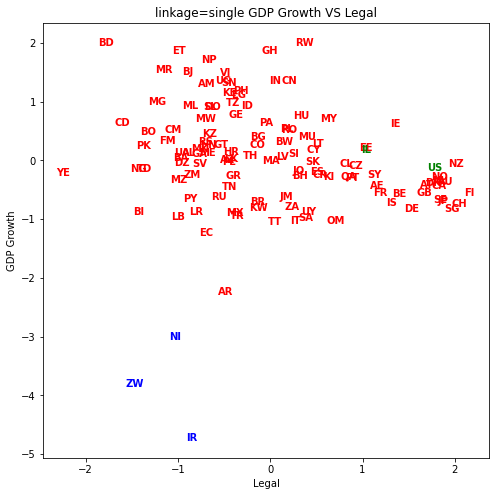


Label Count:
        Country  Abbrev  Label  ward  complete  average
single                                                 
0             3       3      3     3         3        3
1             2       2      2     2         2        2
2           116     116    116   116       116      116


In [22]:
# create copy of results dataframe
compare_data3 = result

# create a list of different linkages we will try 
linkages = ['ward', 'complete', 'average', 'single']

# use a for loop to carry out Alggomerative Clustering using a different
# linkages for each iteration of the loop
for i in range(len(linkages)):
    k = 3
    clustering = AgglomerativeClustering(n_clusters=k, memory=linkages[i], linkage=linkages[i])
    clustering.fit(X2)
    y = clustering.labels_
    
    new_results = pd.DataFrame({'Country':raw['Country'], linkages[i]:y})
    
    # result is the results from when n_init is set at default, 10, using KMeans.
    compare_data3 = pd.merge(compare_data3, new_results, how="left", on=['Country'])
    
    # visualize the data for each iteration 
    figs = [(0, 1), (0, 2), (1, 2)]
    labels = ['Peace', 'Legal', 'GDP Growth']
    visualize(raw, figs, labels, X2, True, title_str='linkage=', var_value=linkages[i])
    
    # count the different labels 
    print("\nLabel Count:")
    print(compare_data3.groupby(linkages[i]).count())

In [23]:
# drop the Abbrev column so that the results can all fit in one row
compare_data3 = compare_data3.drop(labels='Abbrev', axis=1)

# print out the results
with pd.option_context('display.max_rows', None, 'display.max_columns', 7):
    print(compare_data3.sort_values(by=['Label','Country']))

# note: the labels for ward may not be the same as for complete or the other linkages
# refer to scatterplots for correct label definitions 

                          Country  Label  ward  complete  average  single
2                       Argentina      0     0         0        1       2
14                         Brazil      0     0         0        0       2
16                        Burundi      0     2         2        2       2
19                           Chad      0     2         2        2       2
27   Democratic Republic of Congo      0     2         2        2       2
30                        Ecuador      0     0         0        0       2
48                           Iran      0     2         1        1       0
60                        Lebanon      0     2         2        2       2
61                        Liberia      0     0         0        0       2
69                         Mexico      0     2         2        2       2
77                      Nicaragua      0     2         1        1       0
78                        Nigeria      0     2         2        2       2
81                       Pakistan     

In [24]:
# (e) Create a dataframe for Venezuela
Venezuela_data = pd.DataFrame({'Country': 'Venezuela', 'Abbrev': 'VE', 'Corruption': 16, 'Peace': 2.671, 'Legal': 2.895, 'GDP Growth': -35}, index=[121])

In [25]:
# concatenate Venezuela's data onto the result dataframe
new_raw = raw
new_raw = pd.concat([raw, Venezuela_data])
print(new_raw)

       Country Abbrev  Corruption  Peace  Legal  GDP Growth
0      Albania     AL          35  1.821  4.546       2.983
1      Algeria     DZ          35  2.219  4.435       2.553
2    Argentina     AR          45  1.989  5.087      -3.061
3      Armenia     AM          42  2.294  4.812       6.000
4    Australia     AU          77  1.419  8.363       1.713
..         ...    ...         ...    ...    ...         ...
117    Vietnam     VI          37  1.877  5.084       6.500
118      Yemen     YE          15  3.369  2.671       2.113
119     Zambia     ZM          34  1.805  4.592       2.021
120   Zimbabwe     ZW          24  2.463  3.738      -7.077
121  Venezuela     VE          16  2.671  2.895     -35.000

[122 rows x 6 columns]


In [26]:
# normalize all variable values 
X3 = normalize(new_raw[['Peace', 'Legal', 'GDP Growth']])

      Peace     Legal  GDP Growth
0 -0.400182 -0.849636    0.148881
1  0.458391 -0.929350    0.047927
2 -0.037769 -0.461122   -1.270112
3  0.620183 -0.658611    0.857204
4 -1.267384  1.891504   -0.149286


In [27]:
# create copy of result
compare_results4 = result
# use KMeans with 3 clusters
kmeans, y, centers = run_kmeans(3, 10, X3, True)

new_results = pd.DataFrame({'Country':new_raw['Country'], 'New Label':y})

compare_results4 = pd.merge(new_results, compare_results4, how="left", on=['Country'])

inertia for k=3 is 147.3581596115833
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]
 [-0.9090402   1.05949011 -0.05031098]]
cluster labels:  [0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0 2 2 0 2 0 0 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0
 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2 0 2 0 2 2 2 0 0 0 0 0 0
 0 0 2 2 2 2 0 0 0 0 1]


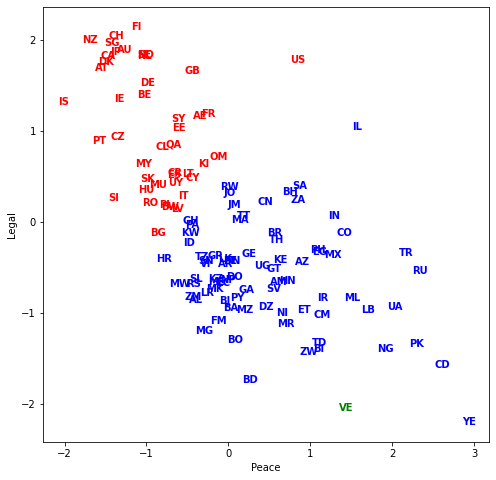

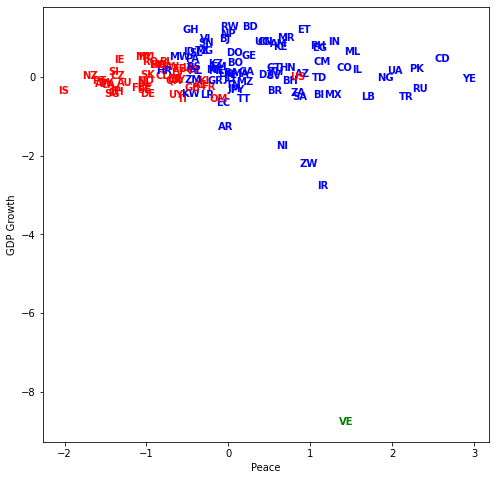

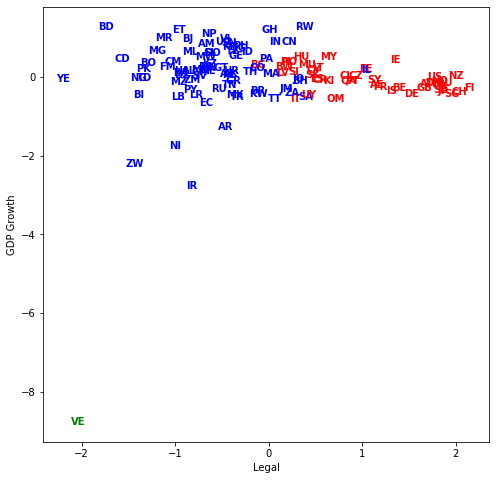

In [28]:
# visualize the new graphs
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
visualize(new_raw, figs, labels, X3, False)

In [29]:
# drop the abbrev column
compare_results4 = compare_results4.drop(labels='Abbrev', axis=1)

# print out the results 
with pd.option_context('display.max_rows', None, 'display.max_columns', 7):
    print(compare_results4.sort_values(by=['Label','Country']))

                          Country  New Label  Label
2                       Argentina          0    0.0
14                         Brazil          0    0.0
16                        Burundi          0    0.0
19                           Chad          0    0.0
27   Democratic Republic of Congo          0    0.0
30                        Ecuador          0    0.0
48                           Iran          0    0.0
60                        Lebanon          0    0.0
61                        Liberia          0    0.0
69                         Mexico          0    0.0
77                      Nicaragua          0    0.0
78                        Nigeria          0    0.0
81                       Pakistan          0    0.0
83                       Paraguay          0    0.0
90                         Russia          0    0.0
92                   Saudi Arabia          0    0.0
99                   South Africa          0    0.0
108           Trinidad and Tobago          0    0.0
110         